In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data.csv',encoding = 'latin1')
groups = data[['app_id', 'description', 'star_rating']].groupby(['app_id','description'])
temp = groups.count()
temp = temp[temp['star_rating']>10]
temp = temp.rename(columns = {'star_rating': 'count'})
df_mean = groups.mean()
df_mean = df_mean.rename(columns = {'star_rating': 'mean_star'})
data = df_mean.merge(temp, left_index = True, right_index = True)['mean_star'].to_frame()
df_description = pd.DataFrame(data.index.values.tolist(), columns = ['app_id', 'description'])

In [3]:
df_description['mean_star'] = data['mean_star'].values

In [4]:
text = df_description['description']

ls = text.values.tolist()
import string
exclude = set(string.punctuation)
for i in range(len(ls)):
    ls[i] = ''.join(ch for ch in ls[i] if ch not in exclude)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', min_df = 0.01,max_df=0.8)
dtm = vectorizer.fit_transform(ls)
terms = vectorizer.get_feature_names()

In [6]:
df_feature = pd.DataFrame(dtm.todense(),columns = vectorizer.get_feature_names())

In [ ]:
df_feature

In [7]:
from sklearn.cluster import KMeans  
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
error = []
for k in range(1,30):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(df_feature)
    error.append(kmeans.inertia_)

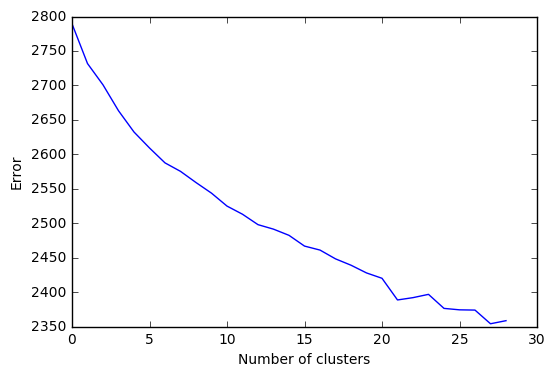

In [8]:
plt.plot(range(len(error)),error[0:])
plt.xlabel('Number of clusters')
dummy = plt.ylabel('Error')
plt.show()

In [30]:
k=27
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=1)
kmeans_cluster = kmeans.fit_predict(df_feature)
kmeans_predict = kmeans.predict(df_feature)
kmeans_cluster

array([ 8,  8, 16, ..., 16,  4, 17])

In [10]:
def get_cluster(cluster, df): 
    d = {}
    i = 0
    cluster = cluster.tolist()
    while i < len(cluster):
        d.setdefault(cluster[i],[]).append(pd.DataFrame([df_feature.loc[i,]]).index.values[0])
        i = i+1
    return d

In [31]:
kcluster = get_cluster(kmeans_cluster, df_feature)

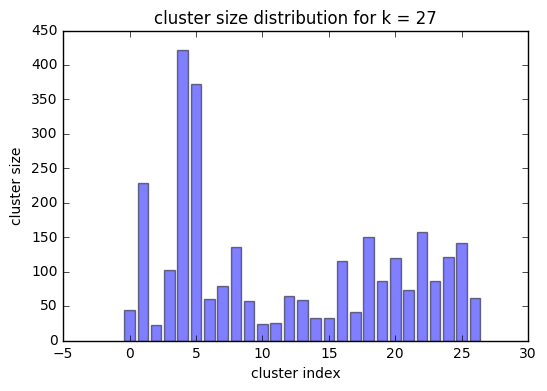

In [33]:
l = []
k = []
for i in kcluster.keys():
    l.append(len(kcluster[i]))
    k.append(list(kcluster.keys())[i])
plt.bar(k,l,align='center', alpha=0.5)
plt.xlabel('cluster index')
plt.ylabel('cluster size')
plt.title('cluster size distribution for k = 27')
 
plt.show()

In [17]:
kcluster.keys().values

AttributeError: 'dict_keys' object has no attribute 'values'

In [ ]:
print("Top terms per cluster:")
asc_order_centroids = kmeans.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
for i in range(27):
    print("Cluster {}:".format(i))
    for ind in order_centroids[i, :20]:
        print(' {}'.format(terms[ind]))
    print('')